To get the required_files
1) Run all the code up till part 4 using the ipynb.2) It will generate the necessary dev.out files needed. ALl the files for grading should already have been generated in their respective ES or RU folder.
3) The explanation for the code are added in as comments at the top of each function or inside the function itself.
Submission by 
Kishen Durairajoo    1005885
Kelvin Thian            1006020
Kevin Teng            1005262
Ong Zheng Han           1005867

# Part 1


In [1]:
#import all necessary dependencies
import math
import copy
from collections import Counter

In [2]:
# Helper function read input files to list 
def read_train(filename):
    data = []
    with open(filename, 'r', encoding='utf-8') as file:
        token_seq , tag_seq , current_token , current_tag = [],[],[],[]
        for line in file:
            token_tag = line.strip().split(" ")

            if len(token_tag) == 2:
                current_token += [token_tag[0]]
                current_tag += [token_tag[1]]
            else:
                token_seq += [current_token]
                tag_seq += [current_tag]
                current_token = []
                current_tag = []
        if (len(current_token) != 0):
            token_seq += [current_token]
            tag_seq += [current_tag]
    return token_seq, tag_seq

#Helper function read input test files
def read_test(filename):
    data = []
    with open(filename, 'r', encoding='utf-8') as file:
        token_seq , current_token = [],[]
        for line in file:
            token_test = line.strip()

            if len(token_test) !=0:
                current_token += [token_test]
                
            else:
                token_seq += [current_token]
                current_token = []  

        if (len(current_token) != 0):
            token_seq += [current_token]
            
    return token_seq


# Helper function, retrieve emission probability for a particular emission at a state
def emission(token, tag, emission_dictionary, uniquetags):
    if not (tag in uniquetags):
        return 0
    elif not (token in emission_dictionary.keys()):
        return emission_dictionary["#UNK#"][tag]
    else:
        if not (tag in emission_dictionary[token].keys()):
            emission_dictionary[token][tag] = 0
        return emission_dictionary[token][tag]
    
#Helper function to save data
def writeoutput(filename, tokens, predicted_tags):
  with open(filename, 'w', encoding='utf-8') as file:

    for i in range(0,len(tokens)):
      for j in range(0,len(tokens[i])):
        file.write(tokens[i][j] + " " + predicted_tags[i][j] + "\n" )

      file.write("\n")
    



# Part 1i + 1ii) Write a function that estimates the emission parameters from the training set using MLE (maximum likelihood estimation)and account for unknown words with #UNK#:

In [3]:
#Helper function, create a probability dictionary for Part 1i
def create_emission_dictionary(token_seq, tag_seq,k):
    emission_dictionary = {} 
    count_tag = {} #number of words tagged with tag
    count_token_tagged_tag = {} #number of times a token is tagged with tag
    for i in range(0,len(token_seq)):
        for j in range(0, len(token_seq[i])):
            x = token_seq[i][j]
            y = tag_seq[i][j]
            if not (y in count_tag.keys()):
                count_tag[y] = 0

            count_tag[y] += 1

            if not (x in count_token_tagged_tag.keys()):
                count_token_tagged_tag[x] = {}

            if not (y in count_token_tagged_tag[x].keys()):
                count_token_tagged_tag[x][y] = 0

            count_token_tagged_tag[x][y] += 1
    
    for i in range(0, len(token_seq)):
        for j in range(0, len(token_seq[i])):
            x = token_seq[i][j]
            y = tag_seq[i][j]
            if not(x in emission_dictionary.keys()):
                emission_dictionary[x] = {}
            emission_dictionary[x][y] = (count_token_tagged_tag[x][y]) / (count_tag[y] + k)
            emission_dictionary[x]["START"] = 0
            emission_dictionary[x]["STOP"] = 0
    # Part 1ii) Account for unknown words
    emission_dictionary["#UNK#"] = {}
    for tag in count_tag.keys():
        emission_dictionary["#UNK#"][tag] = k / (count_tag[tag] + k)
    uniquetags = list(count_tag.keys())
    return emission_dictionary , uniquetags




# Part 1iii)Implement a simple sentiment analysis system that produces the tag

In [4]:
#Sentiment Analysis Function for word tagging
def simple_sentiment_analysis(test_token,emission_dictionary, uniquetags):
    predicted_tags = []
    for token_seq in test_token:
        current_token = []
        for token in token_seq:
            predicted_tag = ""
            max_prob = 0
            for tag in uniquetags:
                prob = emission(token, tag, emission_dictionary, uniquetags)
                if prob > max_prob:
                    max_prob = prob
                    predicted_tag = tag
            current_token += [predicted_tag]
        predicted_tags += [current_token]
        current_token = []
    return predicted_tags

# Part 1 Testing Code Below

In [5]:
#Read the training dataset for Espanol
es_token_seq, es_tag_seq = read_train("ES/train")

#Create emission probability dictionary
es_emission_dictionary, es_unique_tags = create_emission_dictionary(es_token_seq, es_tag_seq, 1)

#Test it using test dataset
es_test_token_seq = read_test("ES/dev.in")
es_predicted_tags = simple_sentiment_analysis(es_test_token_seq, es_emission_dictionary, es_unique_tags)

#Check Outputs
writeoutput("ES/dev.p1.out", es_test_token_seq, es_predicted_tags)
!python "evalResult.py" "ES/dev.out" "ES/dev.p1.out"


#Entity in gold data: 229
#Entity in prediction: 1466

#Correct Entity : 178
Entity  precision: 0.1214
Entity  recall: 0.7773
Entity  F: 0.2100

#Correct Sentiment : 97
Sentiment  precision: 0.0662
Sentiment  recall: 0.4236
Sentiment  F: 0.1145


In [6]:
#Read the training dataset for Russian
ru_token_seq, ru_tag_seq = read_train("RU/train")

#Create emission probability dictionary
ru_emission_dictionary, ru_unique_tags = create_emission_dictionary(ru_token_seq, ru_tag_seq, 1)
ru_test_token_seq = read_test("RU/dev.in")

#Test it using test dataset
ru_predicted_tags = simple_sentiment_analysis(ru_test_token_seq, ru_emission_dictionary, ru_unique_tags)

#Check Outputs
writeoutput("RU/dev.p1.out", ru_test_token_seq, ru_predicted_tags)
!python "evalResult.py" "RU/dev.out" "RU/dev.p1.out"


#Entity in gold data: 389
#Entity in prediction: 1816

#Correct Entity : 266
Entity  precision: 0.1465
Entity  recall: 0.6838
Entity  F: 0.2413

#Correct Sentiment : 129
Sentiment  precision: 0.0710
Sentiment  recall: 0.3316
Sentiment  F: 0.1170


# Part 2I) Write a function that estimates the transition parameters from the training set using MLE (maximum likelihood estimation)

In [7]:
#Creates Transition Probability Dictionary
def create_transition_dictionary(tag_seq, unique_tags):
    transition_dictionary = {}

    for first_tag in unique_tags:
        for second_tag in unique_tags:
            count, total = 0, 0
            for i in tag_seq:
                total += len(i) - 1
                for j in range(len(i) - 1):
                    if i[j] == first_tag and i[j+1] == second_tag:
                        count += 1
            if count != 0:
                transition_dictionary[(first_tag, second_tag)] = count / total

    start_dict = Counter(i[0] for i in tag_seq)
    stop_dict = Counter(i[-1] for i in tag_seq)

    total_sentences = len(tag_seq)

    for tag, count in start_dict.items():
        transition_dictionary[('START', tag)] = count / total_sentences

    for tag, count in stop_dict.items():
        transition_dictionary[(tag, 'STOP')] = count / total_sentences

    return transition_dictionary
    


In [8]:
# Helper function to retrieve transition probability
def transition(transition_dict, previous_tag, current_tag):
    transition_key = (previous_tag, current_tag)
    
    if transition_key not in transition_dict:
        transition_dict[transition_key] = math.log(1)
    
    return transition_dict[transition_key]

# Helper function to retrieve emission probability
def emission(token, tag, emission_dictionary, uniquetags):
    if tag not in uniquetags:
        return math.log(1)
    elif token not in emission_dictionary:
        return emission_dictionary["#UNK#"][tag]
    elif tag not in emission_dictionary[token]:
        return math.log(1)
    else:
        return emission_dictionary[token][tag]

# Main Viterbi Forward and Backwards Algorithm
def viterbi(test_token_seq_sentence, unique_tags, emission_dictionary, transition_dictionary):
    viterbi_probs = {0: {"START": math.log(1)}, **{i: {tag: -math.inf for tag in unique_tags} for i in range(1, len(test_token_seq_sentence) + 1)}}
    
    # Calculate probabilities for each tag in the first word
    for tag in unique_tags:
        emission_prob = emission(test_token_seq_sentence[0], tag, emission_dictionary, unique_tags)
        transition_prob = transition(transition_dictionary, "START", tag)
        
        if emission_prob == 0 or transition_prob == 0:
            viterbi_probs[1][tag] = -math.inf
        else:
            viterbi_probs[1][tag] = math.log(emission_prob) + math.log(transition_prob) + viterbi_probs[0]["START"]
            
    # Calculate probabilities for each tag in the rest of the words
    for i in range(1, len(test_token_seq_sentence)):
        next_token = test_token_seq_sentence[i]
        for j in unique_tags:
            max_prob = -math.inf
            for k in unique_tags:
                emission_prob = emission(next_token, j, emission_dictionary, unique_tags)
                transition_prob = transition(transition_dictionary, k, j)
                
                if emission_prob == 0 or transition_prob == 0:
                    prob = -math.inf
                else:
                    prob = math.log(emission_prob) + math.log(transition_prob) + viterbi_probs[i][k]
                
                if prob > max_prob:
                    max_prob = prob
            viterbi_probs[i+1][j] = max_prob
    
    # Calculate probabilities for transitioning to the "STOP" tag
    max_prob = -math.inf
    for tag in unique_tags:
        previous_prob = viterbi_probs[len(test_token_seq_sentence)][tag]
        transition_prob = transition(transition_dictionary, tag, "STOP")
        
        if transition_prob == 0:
            prob = -math.inf
        else:
            prob = previous_prob + math.log(transition_prob)
        
        if prob > max_prob:
            max_prob = prob
    viterbi_probs[len(test_token_seq_sentence)+1] = {}
    viterbi_probs[len(test_token_seq_sentence)+1]["STOP"] = max_prob
    
    # Backtracking to find the best path
    best_path = []
    argmax = -math.inf
    currentmax = -math.inf
    argmax_tag = "NULL"

    for tag in unique_tags:
        prob = viterbi_probs[len(test_token_seq_sentence)][tag]
        transition_prob = transition(transition_dictionary, tag, "STOP")
        if transition_prob != 0:
            currentmax = prob + math.log(transition_prob)
            
            if currentmax > argmax:
                argmax = currentmax
                argmax_tag = tag

    best_path.append(argmax_tag)
    
    # Backpropagation
    for i in range(len(test_token_seq_sentence), 1, -1):
        argmax = -math.inf
        currentmax = math.log(1)
        
        for tag in unique_tags:
            prob = viterbi_probs[i-1][tag]
            transition_prob = transition(transition_dictionary, tag, best_path[-1])
            
            if transition_prob == 0:
                currentmax = -math.inf
            else:
                currentmax = prob + math.log(transition_prob)
            
            if currentmax > argmax:
                argmax = currentmax
                argmax_tag = tag
        best_path.append(argmax_tag)

    best_path.reverse()
    return best_path

# Iterative function to run viterbi on all sentences in dev.in
def viterbi_loop(test_token_seq, unique_tags, emission_dictionary, transition_dictionary):
    result = []

    for sentence in test_token_seq:
        viterbi_tags = viterbi(sentence, unique_tags, emission_dictionary, transition_dictionary)
        updated_tags = handle_null_tags(sentence, viterbi_tags, unique_tags, emission_dictionary)
        result.append(updated_tags)
    
    return result

# Helper function to account for null tags in dataset
def handle_null_tags(sentence, viterbi_tags, unique_tags, emission_dictionary):
    updated_tags = []

    for i in range(len(sentence)):
        if viterbi_tags[i] == "NULL":
            word = sentence[i]
            max_emission_value = -math.inf
            best_emission_tag = None

            for tag in unique_tags:
                emission_prob = emission(word, tag, emission_dictionary, unique_tags)
                if emission_prob > max_emission_value:
                    max_emission_value = emission_prob
                    best_emission_tag = tag

            if best_emission_tag is not None:
                updated_tags.append(best_emission_tag)
            else:
                # If no valid emission tag found, keep the original "NULL" tag
                updated_tags.append(viterbi_tags[i])
        else:
            updated_tags.append(viterbi_tags[i])
    
    return updated_tags

# Testing Code for Part 2 Espanol

In [9]:

es_token_seq, es_tag_seq = read_train("ES/train")
es_emission_dictionary, es_unique_tags = create_emission_dictionary(es_token_seq, es_tag_seq, 1)
es_test_token_seq = read_test("ES/dev.in")   
es_transition_dictionary = create_transition_dictionary(es_tag_seq, es_unique_tags)
es_predicted_tags_viterbi = viterbi_loop(es_test_token_seq, es_unique_tags, es_emission_dictionary, es_transition_dictionary)
writeoutput("ES/dev.p2.out", es_test_token_seq, es_predicted_tags_viterbi)


!python "evalResult.py" "ES/dev.out" "ES/dev.p2.out"


#Entity in gold data: 229
#Entity in prediction: 25

#Correct Entity : 11
Entity  precision: 0.4400
Entity  recall: 0.0480
Entity  F: 0.0866

#Correct Sentiment : 10
Sentiment  precision: 0.4000
Sentiment  recall: 0.0437
Sentiment  F: 0.0787


# Testing code for Part 2 Russian

In [10]:
ru_token_seq, ru_tag_seq = read_train("RU/train")
ru_emission_dictionary, ru_unique_tags = create_emission_dictionary(ru_token_seq, ru_tag_seq, 1)
ru_test_token_seq = read_test("RU/dev.in")   
ru_transition_dictionary = create_transition_dictionary(ru_tag_seq, ru_unique_tags)
ru_predicted_tags_viterbi = viterbi_loop(ru_test_token_seq, ru_unique_tags, ru_emission_dictionary, ru_transition_dictionary)
writeoutput("RU/dev.p2.out", ru_test_token_seq, ru_predicted_tags_viterbi)
!python "evalResult.py" "RU/dev.out" "RU/dev.p2.out"



#Entity in gold data: 389
#Entity in prediction: 123

#Correct Entity : 56
Entity  precision: 0.4553
Entity  recall: 0.1440
Entity  F: 0.2187

#Correct Sentiment : 43
Sentiment  precision: 0.3496
Sentiment  recall: 0.1105
Sentiment  F: 0.1680


# Part3: Implement an algorithm to find the k-th best output sequences

In [11]:
  
def viterbi_k(test_token_seq_sentence, unique_tags, emission_dictionary, transition_dictionary, k=7):
    viterbi_probs = {0: {"START": [(math.log(1), [])]}, **{i: {tag: [] for tag in unique_tags} for i in range(1, len(test_token_seq_sentence) + 1)}}
    
    # Calculate probabilities for each tag in the first word
    for tag in unique_tags:
        emission_prob = emission(test_token_seq_sentence[0], tag, emission_dictionary, unique_tags)
        transition_prob = transition(transition_dictionary, "START", tag)
        
        if emission_prob != 0 and transition_prob != 0:
            viterbi_probs[1][tag] = [(math.log(emission_prob) + math.log(transition_prob), [])]
    
    # Calculate probabilities for each tag in the rest of the words
    for i in range(1, len(test_token_seq_sentence)):
        next_token = test_token_seq_sentence[i]
        for j in unique_tags:
            max_k_paths = []
            for k_prev in unique_tags:
                if k_prev in viterbi_probs[i]:
                    for prev_prob, prev_path in viterbi_probs[i][k_prev]:
                        emission_prob = emission(next_token, j, emission_dictionary, unique_tags)
                        transition_prob = transition(transition_dictionary, k_prev, j)
                        
                        if emission_prob != 0 and transition_prob != 0:
                            new_prob = math.log(emission_prob) + math.log(transition_prob) + prev_prob
                            max_k_paths.append((new_prob, prev_path + [k_prev]))
            
            max_k_paths.sort(key=lambda x: x[0], reverse=True)
            viterbi_probs[i+1][j] = max_k_paths[:k]
    
    # Find top-k paths ending with "STOP" with bottom up approach 
    max_k_paths = []
    for tag in unique_tags:
        if tag in viterbi_probs[len(test_token_seq_sentence)]:
            for prob, path in viterbi_probs[len(test_token_seq_sentence)][tag]:
                transition_prob = transition(transition_dictionary, tag, "STOP")
                if transition_prob != 0:
                    new_prob = prob + math.log(transition_prob)
                    max_k_paths.append((new_prob, path + [tag]))
    
    max_k_paths.sort(key=lambda x: x[0], reverse=True)
    # Return only the top k paths
    top_k_paths = max_k_paths[:k]
    
    return [path for _, path in top_k_paths]



def viterbi_loop_k(test_token_seq, unique_tags, emission_dictionary, transition_dictionary, k):
    result = []

    for sentence in test_token_seq:
        viterbi_paths = viterbi_k(sentence, unique_tags, emission_dictionary, transition_dictionary, k)
        updated_paths = [handle_null_tags(sentence, path, unique_tags, emission_dictionary) for path in viterbi_paths]
        result.append(updated_paths)
    
    return result
# Helper to write output into file
def writeoutput_k_viterbi(filename, tokens, predicted_tags, k):
    with open(filename, 'w', encoding='utf-8') as file:
        for i in range(len(tokens)):
            if k > 0 and len(predicted_tags[i]) >= k:
                tags_to_write = predicted_tags[i][k - 1]  # k-1 index for 0-based indexing
            else:
                # If there are fewer than k sequences available, write the last one available
                tags_to_write = predicted_tags[i][-1] if predicted_tags[i] else []
                
            
            for j in range(len(tokens[i])):
                if j < len(tags_to_write):
                    file.write(tokens[i][j] + " " + tags_to_write[j] + "\n")
                else:
                    file.write(tokens[i][j] + " " + "NULL" + "\n")
            file.write("\n")



# Part 3 Testing Code for Russian


In [12]:
k_value = 2
ru_token_seq, ru_tag_seq = read_train("RU/train")
ru_emission_dictionary, ru_unique_tags = create_emission_dictionary(ru_token_seq, ru_tag_seq, 1)
ru_test_token_seq = read_test("RU/dev.in")   
ru_transition_dictionary = create_transition_dictionary(ru_tag_seq, ru_unique_tags)
ru_predicted_tags_viterbi_k = viterbi_loop_k(ru_test_token_seq, ru_unique_tags, ru_emission_dictionary, ru_transition_dictionary , k_value)
print(f"Viterbi K best is {ru_predicted_tags_viterbi_k}")
print(f"length is {len(ru_predicted_tags_viterbi_k)}")

# File to test for 2th K Russian
writeoutput_k_viterbi("RU/dev.p3.2nd.out", ru_test_token_seq, ru_predicted_tags_viterbi_k, k_value)
!python "evalResult.py" "RU/dev.out" "RU/dev.p3.2nd.out"

k_value = 8
ru_token_seq, ru_tag_seq = read_train("RU/train")
ru_emission_dictionary, ru_unique_tags = create_emission_dictionary(ru_token_seq, ru_tag_seq, 1)
ru_test_token_seq = read_test("RU/dev.in")   
ru_transition_dictionary = create_transition_dictionary(ru_tag_seq, ru_unique_tags)
ru_predicted_tags_viterbi_k = viterbi_loop_k(ru_test_token_seq, ru_unique_tags, ru_emission_dictionary, ru_transition_dictionary , k_value)
print(f"Viterbi K best is {ru_predicted_tags_viterbi_k}")
print(f"length is {len(ru_predicted_tags_viterbi_k)}")

# File to test for 8th K Russian
writeoutput_k_viterbi("RU/dev.p3.8th.out", ru_test_token_seq, ru_predicted_tags_viterbi_k, k_value)
!python "evalResult.py" "RU/dev.out" "RU/dev.p3.8th.out"






Viterbi K best is [[['B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-positive', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']], [['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']], [['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O']], [['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']], [['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

# Part 3 Testing Code for Espanol

In [13]:
k_value = 2
es_token_seq, es_tag_seq = read_train("ES/train")
es_emission_dictionary, es_unique_tags = create_emission_dictionary(es_token_seq, es_tag_seq, 1)
es_test_token_seq = read_test("ES/dev.in")   
es_transition_dictionary = create_transition_dictionary(es_tag_seq, es_unique_tags)
es_predicted_tags_viterbi_k = viterbi_loop_k(es_test_token_seq, es_unique_tags, es_emission_dictionary, es_transition_dictionary , k_value)
print(f"Viterbi K best is {es_predicted_tags_viterbi_k}")
print(f"length is {len(es_predicted_tags_viterbi_k)}")

# File to test for 2th K Espanol
writeoutput_k_viterbi("ES/dev.p3.2nd.out", es_test_token_seq, es_predicted_tags_viterbi_k, k_value)
!python "evalResult.py" "ES/dev.out" "ES/dev.p3.2nd.out"


k_value = 8
es_token_seq, es_tag_seq = read_train("ES/train")
es_emission_dictionary, es_unique_tags = create_emission_dictionary(es_token_seq, es_tag_seq, 1)
es_test_token_seq = read_test("ES/dev.in")   
es_transition_dictionary = create_transition_dictionary(es_tag_seq, es_unique_tags)
es_predicted_tags_viterbi_k = viterbi_loop_k(es_test_token_seq, es_unique_tags, es_emission_dictionary, es_transition_dictionary , k_value)
print(f"Viterbi K best is {es_predicted_tags_viterbi_k}")
print(f"length is {len(es_predicted_tags_viterbi_k)}")

# File to test for 8th K Espanol
writeoutput_k_viterbi("ES/dev.p3.8th.out", es_test_token_seq, es_predicted_tags_viterbi_k, k_value)
!python "evalResult.py" "ES/dev.out" "ES/dev.p3.8th.out"

Viterbi K best is [[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-negative', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']], [['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O']], [['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O']], [['O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'B-positive', 'O', 'O', 'O']], [['O', 'O', 'O', 'O']], [['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']], [['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

# Question 4 using expectation maximization

In [14]:
# Recalculate emission parameters
def e_step(token_sequences, unique_tags, emission_dictionary, unk_prob):
    expected_counts = {tag: {token: 0 for token in emission_dictionary} for tag in unique_tags}

    for sentence in token_sequences:
        for token in sentence:
            if token in emission_dictionary:
                for tag in unique_tags:
                    expected_counts[tag][token] += unk_prob * emission(token, tag, emission_dictionary, unique_tags)
            else:
                for tag in unique_tags:
                    expected_counts[tag][token] += emission(token, tag, emission_dictionary, unique_tags)

    return expected_counts

# Recalculate parameters for emission 
def m_step(expected_counts, emission_dictionary):
    for token, tag_counts in expected_counts.items():
        total_counts = sum(tag_counts.values())
        new_emission_probs = {}

        for tag, count in tag_counts.items():
            new_emission_probs[tag] = count / total_counts

        emission_dictionary[token] = new_emission_probs

    return emission_dictionary

def expectation_maximization(token_sequences, unique_tags, emission_dictionary, num_iterations=100, unk_prob=1):
    for _ in range(num_iterations):
        expected_counts = e_step(token_sequences, unique_tags, emission_dictionary, unk_prob)
        emission_dictionary = m_step(expected_counts, emission_dictionary)

    return emission_dictionary
def e_step_transition(token_sequences, unique_tags, transition_dictionary):
    expected_transition_counts = {(prev_tag, curr_tag): 0 for prev_tag in unique_tags for curr_tag in unique_tags}

    for sentence in token_sequences:
        for i in range(len(sentence) - 1):
            prev_tag = sentence[i]
            curr_tag = sentence[i + 1]
            
            if (prev_tag, curr_tag) in expected_transition_counts:
                expected_transition_counts[(prev_tag, curr_tag)] += 1

    return expected_transition_counts

# the smoothing is to avoid division by 0
def m_step_transition(expected_transition_counts, transition_dictionary, smoothing=1e-6):
    total_transition_counts = sum(expected_transition_counts.values()) + (len(transition_dictionary) * smoothing)

    for transition, count in expected_transition_counts.items():
        transition_dictionary[transition] = (count + smoothing) / total_transition_counts

    return transition_dictionary


def expectation_maximization_transitions(token_sequences, unique_tags, transition_dictionary, num_iterations=10):
    for _ in range(num_iterations):
        expected_transition_counts = e_step_transition(token_sequences, unique_tags, transition_dictionary)
        transition_dictionary = m_step_transition(expected_transition_counts, transition_dictionary)

    return transition_dictionary

def expectation_maximization_combined(token_sequences, unique_tags, emission_dictionary, transition_dictionary, num_iterations=100, unk_prob=0.5):
    for _ in range(num_iterations):
        # E-step for emissions
        expected_counts = e_step(token_sequences, unique_tags, emission_dictionary, unk_prob)
        emission_dictionary = m_step(expected_counts, emission_dictionary)

        # E-step for transitions
        expected_transition_counts = e_step_transition(token_sequences, unique_tags, transition_dictionary)
        transition_dictionary = m_step_transition(expected_transition_counts, transition_dictionary)

    return emission_dictionary, transition_dictionary
iterations = 200
k_value = 2
print(f"----------------------------------- \nConducting training for {iterations} iterations for k-value = {k_value} \n ---------------------------------------")
print("Espanol Score Generating")

# Running EM for both emissions and transitions
emission_dictionary, transition_dictionary = expectation_maximization_combined(es_token_seq, es_unique_tags, es_emission_dictionary, es_transition_dictionary,iterations,k_value )

# Running Viterbi with the updated parameters
es_predicted_tags_viterbi_em = viterbi_loop(es_test_token_seq, es_unique_tags, es_emission_dictionary, es_transition_dictionary)
writeoutput("ES/dev.p4.out", es_test_token_seq, es_predicted_tags_viterbi_em)
!python "evalResult.py" "ES/dev.out" "ES/dev.p4.out"

print("\nRussian Score Generating")
# Running EM for both emissions and transitions
emission_dictionary, transition_dictionary = expectation_maximization_combined(ru_token_seq, ru_unique_tags, ru_emission_dictionary, ru_transition_dictionary,iterations, k_value )

# Running Viterbi with the updated parameters
ru_predicted_tags_viterbi_em = viterbi_loop(ru_test_token_seq, ru_unique_tags, ru_emission_dictionary, ru_transition_dictionary)
writeoutput("RU/dev.p4.out", ru_test_token_seq, ru_predicted_tags_viterbi_em)
!python "evalResult.py" "RU/dev.out" "RU/dev.p4.out"


----------------------------------- 
Conducting training for 200 iterations for k-value = 2 
 ---------------------------------------
Espanol Score Generating

#Entity in gold data: 229
#Entity in prediction: 1426

#Correct Entity : 177
Entity  precision: 0.1241
Entity  recall: 0.7729
Entity  F: 0.2139

#Correct Sentiment : 103
Sentiment  precision: 0.0722
Sentiment  recall: 0.4498
Sentiment  F: 0.1245

Russian Score Generating

#Entity in gold data: 389
#Entity in prediction: 1806

#Correct Entity : 266
Entity  precision: 0.1473
Entity  recall: 0.6838
Entity  F: 0.2424

#Correct Sentiment : 143
Sentiment  precision: 0.0792
Sentiment  recall: 0.3676
Sentiment  F: 0.1303


In [41]:
#bigram implementation
from collections import Counter

def create_transition_dictionary_bigram(tag_seq, unique_tags):
    transition_dictionary = {}

    for first_tags in unique_tags:
        for second_tags in unique_tags:
            count, total = 0, 0
            for i in tag_seq:
                total += len(i) - 1
                for j in range(len(i) - 1):
                    if i[j] == first_tags[0] and i[j+1] == second_tags[0]:  # Assuming bigram tags are tuples
                        count += 1
            if count != 0:
                transition_dictionary[(first_tags, second_tags)] = count / total

    start_dict = Counter(i[0] for i in tag_seq)
    stop_dict = Counter(i[-1] for i in tag_seq)

    total_sentences = len(tag_seq)

    for tag, count in start_dict.items():
        transition_dictionary[('START', tag)] = count / total_sentences

    for tag, count in stop_dict.items():
        transition_dictionary[(tag, 'STOP')] = count / total_sentences

    return transition_dictionary

def create_emission_dictionary_bigram(token_seq, tag_seq, k):
    emission_dictionary = {}
    count_tag = {}  # number of words tagged with tag
    count_token_tagged_tag = {}  # number of times a token is tagged with tag

    for i in range(0, len(token_seq)):
        if len(token_seq[i]) == 1:  # Handle single-word token sequences
            x = token_seq[i][0]
            y = tag_seq[i][0]
            if not (y in count_tag.keys()):
                count_tag[y] = 0

            count_tag[y] += 1

            if not (x in count_token_tagged_tag.keys()):
                count_token_tagged_tag[x] = {}

            if not (y in count_token_tagged_tag[x].keys()):
                count_token_tagged_tag[x][y] = 0

            count_token_tagged_tag[x][y] += 1
        else:
            for j in range(0, len(token_seq[i])):
                x = token_seq[i][j]
                y = tag_seq[i][j]
                if not (y in count_tag.keys()):
                    count_tag[y] = 0

                count_tag[y] += 1

                if not (x in count_token_tagged_tag.keys()):
                    count_token_tagged_tag[x] = {}

                if not (y in count_token_tagged_tag[x].keys()):
                    count_token_tagged_tag[x][y] = 0

                count_token_tagged_tag[x][y] += 1

    for i in range(0, len(token_seq)):
        if len(token_seq[i]) == 1:  # Handle single-word token sequences
            x = token_seq[i][0]
            y = tag_seq[i][0]
            if not (x in emission_dictionary.keys()):
                emission_dictionary[x] = {}

            if not (y in emission_dictionary[x].keys()):
                emission_dictionary[x][y] = {}

            emission_dictionary[x][y]["START"] = 0  # Create nested dictionary
            emission_dictionary[x][y]["STOP"] = 0   # Create nested dictionary
        else:
            for j in range(0, len(token_seq[i])):
                x = token_seq[i][j]
                y = tag_seq[i][j]
                if not (x in emission_dictionary.keys()):
                    emission_dictionary[x] = {}

                if not (y in emission_dictionary[x].keys()):
                    emission_dictionary[x][y] = {}

                emission_dictionary[x][y]["START"] = 0  # Create nested dictionary
                emission_dictionary[x][y]["STOP"] = 0   # Create nested dictionary

    for i in range(0, len(token_seq)):
        if len(token_seq[i]) == 1:  # Handle single-word token sequences
            x = token_seq[i][0]
            y = tag_seq[i][0]
            emission_dictionary[x][y] = (count_token_tagged_tag[x][y]) / (count_tag[y] + k)
        else:
            for j in range(0, len(token_seq[i])):
                x = token_seq[i][j]
                y = tag_seq[i][j]
                emission_dictionary[x][y] = (count_token_tagged_tag[x][y]) / (count_tag[y] + k)

    # Part 1ii) Account for unknown words
    emission_dictionary["#UNK#"] = {}
    for tag in count_tag.keys():
        emission_dictionary["#UNK#"][tag] = k / (count_tag[tag] + k)

    uniquetags = list(count_tag.keys())
    return emission_dictionary, uniquetags


# Helper function to retrieve transition probability
def transition_bigram(transition_dict, previous_tag, current_tag):
    transition_key = (previous_tag, current_tag)
    
    if transition_key not in transition_dict:
        return -math.inf
    
    return math.log(transition_dict[transition_key])

# Helper function to retrieve emission probability
def emission_bigram(token, tag, emission_dictionary, uniquetags):
    if tag not in uniquetags:
        return -math.inf
    elif token not in emission_dictionary:
        return emission_dictionary["#UNK#"][tag]
    elif tag not in emission_dictionary[token]:
        return -math.inf
    else:
        return math.log(emission_dictionary[token][tag])

# Main Viterbi Forward and Backwards Algorithm
def viterbi_bigram(test_token_seq_sentence, unique_tags, emission_dictionary, transition_dictionary):
    viterbi_probs = {0: {"START": math.log(1)}, **{i: {tag: -math.inf for tag in unique_tags} for i in range(1, len(test_token_seq_sentence) + 1)}}
    
    # Calculate probabilities for each tag in the first word
    for tag in unique_tags:
        emission_prob = emission_bigram(test_token_seq_sentence[0], tag, emission_dictionary, unique_tags)
        transition_prob = transition_bigram(transition_dictionary, "START", tag)
        
        viterbi_probs[1][tag] = emission_prob + transition_prob + viterbi_probs[0]["START"]
            
    # Calculate probabilities for each tag in the rest of the words
    for i in range(1, len(test_token_seq_sentence)):
        next_token = test_token_seq_sentence[i]
        for j in unique_tags:
            max_prob = -math.inf
            for k in unique_tags:
                emission_prob = emission_bigram(next_token, j, emission_dictionary, unique_tags)
                transition_prob = transition_bigram(transition_dictionary, k, j)
                
                prob = emission_prob + transition_prob + viterbi_probs[i][k]
                
                if prob > max_prob:
                    max_prob = prob
            viterbi_probs[i+1][j] = max_prob
    
    # Calculate probabilities for transitioning to the "STOP" tag
    max_prob = -math.inf
    for tag in unique_tags:
        previous_prob = viterbi_probs[len(test_token_seq_sentence)][tag]
        transition_prob = transition_bigram(transition_dictionary, tag, "STOP")
        
        prob = previous_prob + transition_prob
        
        if prob > max_prob:
            max_prob = prob
    viterbi_probs[len(test_token_seq_sentence)+1] = {}
    viterbi_probs[len(test_token_seq_sentence)+1]["STOP"] = max_prob
    
    # Backtracking to find the best path
    best_path = []
    argmax = -math.inf
    currentmax = -math.inf
    argmax_tag = "NULL"

    for tag in unique_tags:
        prob = viterbi_probs[len(test_token_seq_sentence)][tag]
        transition_prob = transition_bigram(transition_dictionary, tag, "STOP")
        currentmax = prob + transition_prob
            
        if currentmax > argmax:
            argmax = currentmax
            argmax_tag = tag

    best_path.append(argmax_tag)
    
    # Backpropagation
    for i in range(len(test_token_seq_sentence), 1, -1):
        argmax = -math.inf
        
        for tag in unique_tags:
            prob = viterbi_probs[i-1][tag]
            transition_prob = transition_bigram(transition_dictionary, tag, best_path[-1])
            
            currentmax = prob + transition_prob
            
            if currentmax > argmax:
                argmax = currentmax
                argmax_tag = tag
        best_path.append(argmax_tag)

    best_path.reverse()
    return best_path

# Iterative function to run viterbi on all sentences in dev.in
def viterbi_loop_bigram(test_token_seq, unique_tags, emission_dictionary, transition_dictionary):
    result = []

    for sentence in test_token_seq:
        viterbi_tags = viterbi_bigram(sentence, unique_tags, emission_dictionary, transition_dictionary)
        updated_tags = handle_null_tags(sentence, viterbi_tags, unique_tags, emission_dictionary)
        result.append(updated_tags)
    
    return result

# Helper function to account for null tags in dataset
def handle_null_tags(sentence, viterbi_tags, unique_tags, emission_dictionary):
    updated_tags = []

    for i in range(len(sentence)):
        if viterbi_tags[i] == "NULL":
            word = sentence[i]
            max_emission_value = -math.inf
            best_emission_tag = None

            for tag in unique_tags:
                emission_prob = emission_bigram(word, tag, emission_dictionary, unique_tags)
                if emission_prob > max_emission_value:
                    max_emission_value = emission_prob
                    best_emission_tag = tag

            if best_emission_tag is not None:
                updated_tags.append(best_emission_tag)
            else:
                # If no valid emission tag found, keep the original "NULL" tag
                updated_tags.append(viterbi_tags[i])
        else:
            updated_tags.append(viterbi_tags[i])
    
    return updated_tags


ru_token_seq, ru_tag_seq = read_train("RU/train")
ru_emission_dictionary, ru_unique_tags = create_emission_dictionary_bigram(ru_token_seq, ru_tag_seq, 1)
ru_test_token_seq = read_test("RU/dev.in")   
ru_transition_dictionary = create_transition_dictionary_bigram(ru_tag_seq, ru_unique_tags)
ru_predicted_tags_viterbi_bigram = viterbi_loop_bigram(ru_test_token_seq, ru_unique_tags, ru_emission_dictionary, ru_transition_dictionary)
writeoutput("RU/dev.p4.out", ru_test_token_seq, ru_predicted_tags_viterbi_bigram)
!python "evalResult.py" "RU/dev.out" "RU/dev.p4.out"


es_token_seq, es_tag_seq = read_train("ES/train")
es_emission_dictionary, es_unique_tags = create_emission_dictionary_bigram(es_token_seq, es_tag_seq, 1)
es_test_token_seq = read_test("ES/dev.in")   
es_transition_dictionary = create_transition_dictionary_bigram(es_tag_seq, es_unique_tags)
es_predicted_tags_viterbi = viterbi_loop_bigram(es_test_token_seq, es_unique_tags, es_emission_dictionary, es_transition_dictionary)
writeoutput("ES/dev.p4.out", es_test_token_seq, es_predicted_tags_viterbi)


!python "evalResult.py" "ES/dev.out" "ES/dev.p4.out"


#Entity in gold data: 389
#Entity in prediction: 459

#Correct Entity : 62
Entity  precision: 0.1351
Entity  recall: 0.1594
Entity  F: 0.1462

#Correct Sentiment : 32
Sentiment  precision: 0.0697
Sentiment  recall: 0.0823
Sentiment  F: 0.0755

#Entity in gold data: 229
#Entity in prediction: 235

#Correct Entity : 18
Entity  precision: 0.0766
Entity  recall: 0.0786
Entity  F: 0.0776

#Correct Sentiment : 12
Sentiment  precision: 0.0511
Sentiment  recall: 0.0524
Sentiment  F: 0.0517


# Question 4 Using External Libraries 
Our approach is to train a new pytorch model 
We set 100 to the embedding dimension to have a better range of sensitivity to the relationships between each possible node
and set 200 to the hidden dimension for a 200 layer RNN

We set epoch to be 800 as it starts plateauing thereafter and batchsize to be 1000 to not be too big or too small for a stable gradient that is still sensitive to changes between dataset.

It is trained using gpu on google collab link below

https://colab.research.google.com/drive/1dsjMv1zOb1ruNEn0AfuFfSgZ1Kv1sYSo?usp=sharing

We then loaded each test.in for RU and ES.

To evaluate and generate the tags use the model russian_final.pt and espanol_final.pt

In [ ]:
# Trained using google collab
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt

class Sentimenttagging(Dataset):
    def __init__(self, word_sequences, tag_sequences):
        self.word_sequences = word_sequences
        self.tag_sequences = tag_sequences

    def __len__(self):
        return len(self.word_sequences)

    def __getitem__(self, idx):
        words = torch.LongTensor(self.word_sequences[idx])
        tags = torch.LongTensor(self.tag_sequences[idx])
        return words, tags

    def collate_fn(self, batch):
        # Sort batch by sequence length (descending)
        batch.sort(key=lambda x: len(x[0]), reverse=True)
        words, tags = zip(*batch)

        # Pad sequences
        words_padded = nn.utils.rnn.pad_sequence(words, batch_first=True)
        tags_padded = nn.utils.rnn.pad_sequence(tags, batch_first=True)

        return words_padded, tags_padded
    
#  Inititate Torch Model
class SentimentModel(nn.Module):
    def __init__(self, vocab_size, tag_size, embedding_dim, hidden_dim):
        super(SentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, tag_size)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.fc(x)
        return x

cpu
Epoch 1/1, Loss: 1.4548535346984863


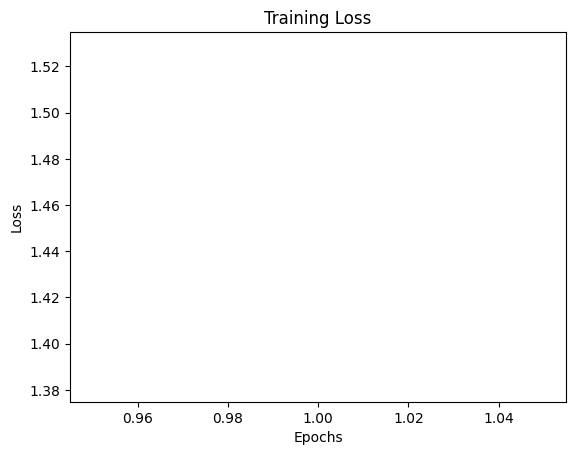

In [ ]:
#DO NOT RUN
    
# Sample word_sequences = ['Еда', 'вкусная', ',', 'но', 'отдельно', 'хочу', 'отметить', 'красивую', 'сервировку', 'блюд', ';', '.']
# Sample tag_sequences = ['B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'I-positive', 'O', 'O']
    
# Set ur file path for ur train sequence
word_sequences , tag_sequences = read_train("ES/train")

# Word mappings and index
word_to_idx = {}  
tag_to_idx = {}   

# Iterate through the word and tag sequences to populate the dictionaries
for sentence in word_sequences:
    for word in sentence:
        if word not in word_to_idx:
            word_to_idx[word] = len(word_to_idx)

for tags in tag_sequences:
    for tag in tags:
        if tag not in tag_to_idx:
            tag_to_idx[tag] = len(tag_to_idx)

word_sequences = [[word_to_idx[word] for word in seq] for seq in word_sequences]
tag_sequences = [[tag_to_idx[tag] for tag in seq] for seq in tag_sequences]




vocab_size = len(word_to_idx)
tag_size = len(tag_to_idx)
embedding_dim = 100
hidden_dim = 200
# Create the dataset and DataLoader
dataset = Sentimenttagging(word_sequences, tag_sequences)
dataloader = DataLoader(dataset, batch_size=1000, collate_fn=dataset.collate_fn)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = SentimentModel(vocab_size, tag_size, embedding_dim, hidden_dim)
model.to(device)  # Move model to GPU
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().to(device)


epochs = 1
loss_list = []


for epoch in range(epochs):
    for words, tags in dataloader:
        # Convert words and tags to tensors
        # words = torch.LongTensor(words)
        # tags = torch.LongTensor(tags)
        words = words.to(device)  
        tags = tags.to(device)    
        

        # Forward pass
        outputs = model(words)

        # Compute the loss
        loss = criterion(outputs.view(-1, tag_size), tags.view(-1))

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")
    loss_list.append(loss.item())
    
model_save_path = "test.pt" #set ur own
torch.save(model.state_dict(), model_save_path)    
plt.plot(range(1, epochs + 1), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()







In [ ]:
# Do training 

In [ ]:
#reload to check
model_save_path = "espanol_final.pt"


loaded_model = SentimentModel(vocab_size, tag_size, 100, 200)
loaded_model.load_state_dict(torch.load(model_save_path, map_location=torch.device('cpu')))
loaded_model.eval()  # Set the model to evaluation mode

def convert_text_to_indices(text, word_to_idx):
    if type(text) == list :
        words = text
    else:
        words = text.split()
    default_idx = word_to_idx.get("O", 0)  # Use index 0 as default for unknown words
    indices = [word_to_idx.get(word, default_idx) for word in words]
    return indices

def predict_text_sequence(model, text, word_to_idx):
    model.eval()
    with torch.no_grad():
        indices = convert_text_to_indices(text, word_to_idx)
        inputs = torch.LongTensor(indices).unsqueeze(0)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 2)
        return predicted.squeeze().tolist()


In [ ]:
def read_test(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        token_seq, current_token = [], []
        for line in file:
            token = line.strip()  # Assuming each line is a token

            if token:
                current_token.append(token)
            else:
                if current_token:
                    token_seq.append(current_token)
                    current_token = []

        if current_token:
            token_seq.append(current_token)
            
    return token_seq
idx_to_tag = {idx: tag for tag, idx in tag_to_idx.items()}

ru_test_token = read_test("ES/test.in")
print(len(ru_test_token))
print(ru_test_token)
label_list = []
predictions=[]
for index , each_sentence in enumerate(ru_test_token) :
    print(each_sentence)
    predictions = predict_text_sequence(loaded_model, each_sentence, word_to_idx)
    if len(each_sentence) == 1:
        predictions = [predictions]
    print(predictions)
    # Convert predicted indices to tag labels
    predicted_tags = [idx_to_tag[idx] for idx in predictions]
    print(len(each_sentence),len(predictions))
    label_list.append(predicted_tags)
print(label_list)

FileNotFoundError: [Errno 2] No such file or directory: 'ES/test.in'